In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import csv
import os
import numpy as np
import pandas as pd

BASE_PATH = '/content/drive/My Drive/NLP Speech/raw_csv'
MFCC_DIR_PATH = 'mfcc'

data = []

for mfcc in os.listdir(f'{BASE_PATH}/{MFCC_DIR_PATH}/'):
    df_mfcc=pd.read_csv(f'{BASE_PATH}/{MFCC_DIR_PATH}/{mfcc}')
    mfcc = mfcc.replace('.csv','')
    result = ''.join([i for i in mfcc if not i.isdigit()])
    label = result[5:].upper()
    df_mfcc['label'] = label
    data.append(df_mfcc.values.tolist()[0])
columns_name = df_mfcc.columns
print(columns_name)
print(data)
print(len(data))

In [ ]:
with open('data_mfcc.csv', 'w', newline='') as mfccfile:
    csv_out=csv.writer(mfccfile)
    csv_out.writerow(columns_name)
    for row in data:
        csv_out.writerow(row)

In [1]:
import pandas as pd
df=pd.read_csv('data_mfcc.csv')
df.head()

,ceps_coef1,ceps_coef2,ceps_coef3,ceps_coef4,ceps_coef5,ceps_coef6,ceps_coef7,ceps_coef8,ceps_coef9,ceps_coef10,...,delta_delta_ceps_coef4,delta_delta_ceps_coef5,delta_delta_ceps_coef6,delta_delta_ceps_coef7,delta_delta_ceps_coef8,delta_delta_ceps_coef9,delta_delta_ceps_coef10,delta_delta_ceps_coef11,delta_delta_ceps_coef12,label
0,12.953371,-1.839947,-6.191054,12.688773,10.560601,-17.803472,8.979078,-10.707094,1.014091,-5.232505,...,0.075635,0.032239,0.085708,0.171363,0.103611,0.031900,0.079231,0.048326,0.022043,VE
1,0.880012,-5.264096,-21.106609,-8.885929,9.517048,-11.853935,0.842559,0.787596,-0.088254,0.122655,...,0.023659,0.068669,-0.110991,0.022863,0.037382,0.048941,-0.003068,-0.051647,-0.093710,VE
2,13.168605,-4.443160,-12.356338,6.639299,11.390787,-15.697709,19.860325,-0.214955,7.079817,-6.327080,...,0.054063,0.086280,0.021261,-0.008851,-0.073882,-0.120399,-0.008125,0.042860,-0.003991,VE
3,12.422301,-2.329203,-4.522976,11.174823,0.009441,-10.825247,13.338284,-8.044522,0.236441,4.549848,...,0.038706,-0.023582,0.109124,0.031601,0.029335,-0.033571,-0.015815,-0.053413,-0.054173,VE
4,18.202444,27.725787,-20.840150,6.262290,13.904043,2.781843,-7.717218,-37.249813,-25.457235,-16.773272,...,-0.080641,0.099612,-0.175640,0.013145,0.462013,-0.353715,-0.173741,-0.024956,0.157171,VE


In [2]:
df = df.dropna()
df.shape

(2186, 37)

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.utils.testing import ignore_warnings
train = df.copy()
def shuffle(df, n=1, axis=0):
    df = df.copy()
    df2 = df.reindex(np.random.permutation(df.index))
    return df2
train = shuffle(train)
y = train.pop('label').values
X = train
kf = KFold(n_splits=10)

@ignore_warnings(category=Warning)
def kf_pred(clf, X, y):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        predict = cross_val_predict(clf, X_test, y_test, cv=10)
        print("Accuracy:", accuracy_score(y_test, predict, normalize=True) * 100)
        print("Precision:", precision_score(y_test, predict, average='macro') * 100)
        print("Recall:", recall_score(y_test, predict, average='macro') * 100)

# X_train, X_test, y_train, y_test = train_test_split( 
#           X, Y, test_size = 0.3, random_state = 100)

In [18]:
tree_clf_kf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)
kf_pred(tree_clf_kf, X, y)


Accuracy: 9.58904109589041
Precision: 1.3597470238095237
Recall: 5.182072829131653
Accuracy: 5.93607305936073
Precision: 1.4561688311688312
Recall: 4.483537296037296
Accuracy: 5.47945205479452
Precision: 3.149610881929961
Recall: 4.786093536093537
Accuracy: 5.93607305936073
Precision: 2.4110623781676415
Recall: 4.80098605098605
Accuracy: 5.93607305936073
Precision: 3.2684314018319394
Recall: 4.741647241647242
Accuracy: 9.58904109589041
Precision: 1.954861111111111
Recall: 7.04871721415839
Accuracy: 10.091743119266056
Precision: 2.5615301566388524
Recall: 7.068602693602694
Accuracy: 6.8807339449541285
Precision: 2.146269903470474
Recall: 5.038526288526288
Accuracy: 9.174311926605505
Precision: 2.3938970690615426
Recall: 6.069139194139195
Accuracy: 9.174311926605505
Precision: 2.5827020202020203
Recall: 5.481601731601732


In [19]:
from sklearn.tree import export_graphviz
import graphviz
clf_entropy = DecisionTreeClassifier( 
        criterion = "entropy", random_state = 100, 
        max_depth = 3, min_samples_leaf = 5) 

scores = cross_val_score(clf_entropy, X_train, y_train, cv=10, scoring='accuracy')

# Performing training 
clf_entropy.fit(X_train, y_train) 
y_pred = clf_entropy.predict(X_test)

In [20]:
#from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
#print("Confusion Matrix: ",  confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

print("Report : ", classification_report(y_test, y_pred)) 

Accuracy :  8.256880733944955
Report :                precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           E       0.10      0.11      0.11         9
          EU       0.00      0.00      0.00        13
           I       0.29      0.18      0.22        11
           O       0.00      0.00      0.00         7
          TA       0.19      0.40      0.26        10
          TE       0.00      0.00      0.00         5
         TEU       0.00      0.00      0.00         7
          TI       0.00      0.00      0.00         8
          TO       0.00      0.00      0.00         7
          TU       0.00      0.00      0.00         7
           U       0.13      0.27      0.18        11
          VA       0.00      0.00      0.00        11
          VE       0.06      0.42      0.11        12
         VEU       0.00      0.00      0.00        13
          VI       0.00      0.00      0.00        10
          VO       0.00      0.00      0.

c:\users\ayrton\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


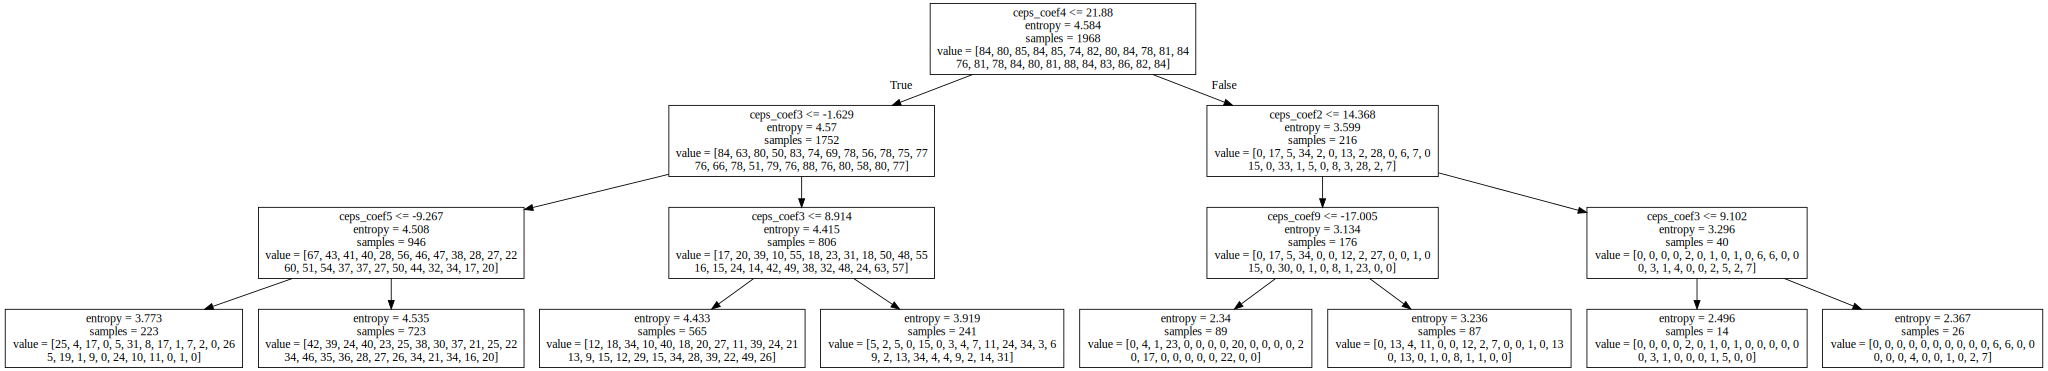

In [21]:
>>> import graphviz 
>>> dot_data = export_graphviz(clf_entropy, out_file=None,feature_names=X.columns) 
>>> graph = graphviz.Source(dot_data) 
graph

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='adam', alpha=1e-5, learning_rate_init=0.001, batch_size=10,
                    hidden_layer_sizes=(128, 74), random_state=np.random.randint(0,1689453), max_iter=5000)

kf_pred(nn, X, y)

Accuracy: 20.54794520547945
Precision: 24.031466218966223
Recall: 20.72152248622837
Accuracy: 23.74429223744292
Precision: 28.29689781895664
Recall: 23.04213147963148
Accuracy: 21.91780821917808
Precision: 20.554202741702742
Recall: 21.057634495134494
Accuracy: 20.091324200913242
Precision: 18.068434976329716
Recall: 18.322661135161137
Accuracy: 21.91780821917808
Precision: 18.334958779037724
Recall: 18.935578310578315
Accuracy: 19.17808219178082
Precision: 19.09126684861979
Recall: 18.124298087533383
Accuracy: 19.26605504587156
Precision: 19.625539709059527
Recall: 18.353313353313354
Accuracy: 13.761467889908257
Precision: 11.054062699283286
Recall: 11.981051356051358
Accuracy: 24.770642201834864
Precision: 23.7153934028934
Recall: 23.09787434787435
